The dogs-versus-cats dataset contains 25,000 images of dogs and cats (12,500 from each class). we will create a new
dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [4]:
import os, shutil

original_dataset_dir = '/Users/Satish/python_files/kaggle_original_data/train' 

##################### Directory to store smaller dataset ##########################################
base_dir = '/Users/Satish/python_files/cats_and_dogs_small'
os.mkdir(base_dir)

############# Directories for the training, validation, & test splits ############################
train_dir =os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

##################### Directory with train dog pictures ##########################################
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

##################### Directory with Validation dog pictures #####################################
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


#################### Directory with test dog pictures ##########################################
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

##################### Copies the first 1,000 cat images to train_cats_dir ########################

fnames = ['cat.{}.jpg.'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
##################### Copies the next 500 cat images to validation_cats_dir ########################

fnames = ['cat.{}.jpg.'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)    
    
#################### Copies the next 500 cat images to test_cats_dir ########################

fnames = ['cat.{}.jpg.'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)     
    
##################### Copies the first 1,000 dog images to train_dogs_dir ########################

fnames = ['dog.{}.jpg.'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
##################### Copies the next 500 dog images to validation_dogs_dir ########################

fnames = ['dog.{}.jpg.'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)    
    
#################### Copies the next 500 dog images to test_dogs_dir ###############################

fnames = ['dog.{}.jpg.'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)    
    


In [5]:
##################### Count how many pictures in each split ##########################################    

print("Total training Cat images: ", len(os.listdir(train_cats_dir)))
print("Total training Dogs images: ", len(os.listdir(train_dogs_dir)))
print("Total Validation Cat images: ", len(os.listdir(validation_cats_dir)))
print("Total Validation Dogs images: ", len(os.listdir(validation_dogs_dir)))
print("Total Test Cat images: ", len(os.listdir(test_cats_dir)))
print("Total Test Dogs images: ", len(os.listdir(test_dogs_dir)))

Total training Cat images:  1000
Total training Dogs images:  1000
Total Validation Cat images:  500
Total Validation Dogs images:  500
Total Test Cat images:  500
Total Test Dogs images:  500


In [6]:
##################### 5.5 Instantiating a small convnet for dogs vs. cats classification ########################

#### Each split contains the same number of samples from each class
#### this is a bal anced binary-classification problem, classification accuracy will be anappropriate measure of success

from keras import models
from keras import layers

model = models.Sequential()

### As we are dealing with bigger images and a more complex problem, we will use 4 layers of Conv2D + MaxPooling2D stage

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))#input size (150 x 150) arbitary choice
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) ## Binary Classifition problem, last Dense layer's size is 1 with 
                                                 ## Sigmoid Activition 

model.summary()

### The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the 
## feature maps decreases (from 148 × 148 to 7 × 7).



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:

##################### 5.6 Configuring the model for training #############################################

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])


##################### 5.7 Using ImageDataGenerator to read images from directories ########################

### Keras contains the class ImageDataGenerator which transformed image files of JPEG format from local disk into
### appropriately preprocessed floating point tensors before being fed into the network

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) ## Rescales all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255) ## Rescales all images by 1/255

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

############### Let’s look at the output of one of these generators

for data_batch, label_batch in train_generator:
    print('Data Batch shape', data_batch.shape)
    print('Label batch shape', label_batch.shape)
    break

##################### 5.8 Fitting the model using a batch generator #####################################    

### fit the model to the data using the generator, fit_generator method is used whidh is equivalent of fit for data generators 
### In this the data is being generated endlessly, Keras modelneeds to know how many samples to draw from the generator
### for this steps_per_epoch argument is used.

### argumentbatches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples

### using fit_generator we can pass a argument validation_data which will give batches of validation data endlessly
### That's y validation_steps argument used to tells the process no. of batches to draw from the validation generator for evaluation

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

##################### 5.9 Saving the model #################################################################

model.save('cats_n_dogs_small_1.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Data Batch shape (20, 150, 150, 3)
Label batch shape (20,)
Epoch 1/30
  7/100 [=>............................] - ETA: 2:05 - loss: 0.7189 - acc: 0.5429

KeyboardInterrupt: 

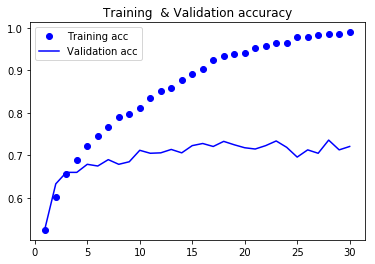

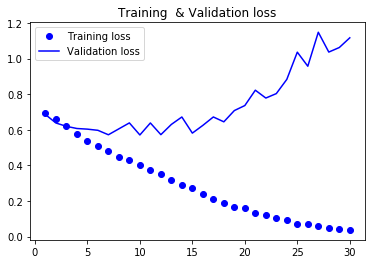

In [17]:
##################### 5.10 Displaying curves of loss and accuracy during training ###########################

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training  & Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training  & Validation loss')
plt.legend()

plt.show()



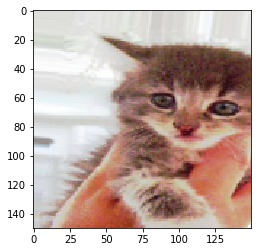

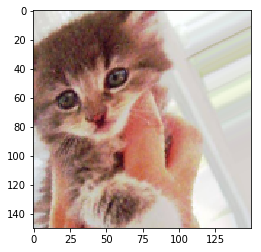

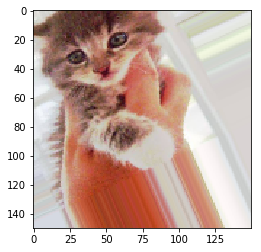

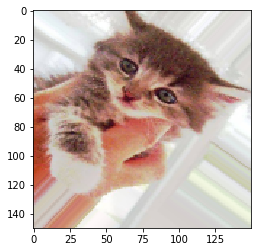

In [18]:
##################### 5.11 Setting up a data augmentation configuration via ImageDataGenerator #####################

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

##################### 5.12 Displaying some randomly augmented training images #####################################

from keras.preprocessing import image ## Module with imagepreprocessing utilities

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] ## Chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150)) ## Reads the image and resizes it
x = image.img_to_array(img) ## Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1, ) + x.shape)## Reshapes it to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1): ### Generates batches of randomly transformed images.
    plt.figure(i)
    imgplt = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break ## Loops indefinitely, so need to break the loop at some point
plt.show()        


In [8]:
##################### 5.13 Defining a new convnet that includes dropout #####################################

### To fight overfitting, add a Dropout layer to your model right before the densely connected classifier.

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
                                                
#################### 5.14 Training the convnet using data-augmentation generators #############################

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) ## validation data should not be augmented

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=50)

model.save('cats_and_dogs_small_2.h5') ### Save the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

Epoch 47/100
100/100 [==============================] - 143s 1s/step - loss: 0.4749 - acc: 0.7815 - val_loss: 0.4863 - val_acc: 0.7760
Epoch 48/100
100/100 [==============================] - 142s 1s/step - loss: 0.4677 - acc: 0.7855 - val_loss: 0.5107 - val_acc: 0.7630
Epoch 49/100
100/100 [==============================] - 142s 1s/step - loss: 0.4515 - acc: 0.7895 - val_loss: 0.4834 - val_acc: 0.7830
Epoch 50/100
100/100 [==============================] - 142s 1s/step - loss: 0.4666 - acc: 0.7790 - val_loss: 0.4727 - val_acc: 0.7720
Epoch 51/100
100/100 [==============================] - 142s 1s/step - loss: 0.4502 - acc: 0.7865 - val_loss: 0.4859 - val_acc: 0.7700
Epoch 52/100
100/100 [==============================] - 142s 1s/step - loss: 0.4647 - acc: 0.7755 - val_loss: 0.4718 - val_acc: 0.7810
Epoch 53/100
100/100 [==============================] - 142s 1s/step - loss: 0.4566 - acc: 0.7800 - val_loss: 0.5012 - val_acc: 0.7720
Epoch 54/100
100/100 [==============================] -

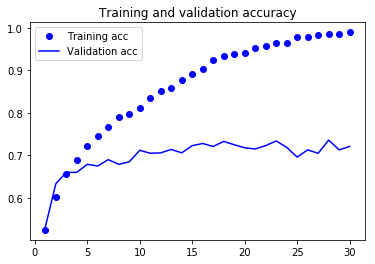

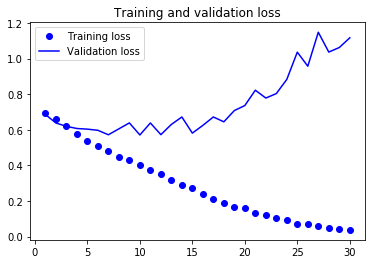

In [21]:
#################### 5.15 plot the results #################################################

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
#################### 5.16 Instantiating the VGG16 convolutional base ########################################

from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

conv_base.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [46]:
################################## FEATURE EXTRACTION WITHOUT DATA AUGMENTATION ######################################

#################### 5.17 Extracting features using the pretrained convolutional base ##########################

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/Satish/python_files/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
#         print(inputs_batch)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break ## generators yield data indefinitely in a loop, we must break after every image has been seen once
    return features, labels

# train_features, train_labels = extract_features(train_dir, 2000)
# validation_features, validation_labels = extract_features(validation_dir, 1000)
# test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5861 - acc: 0.6740 - val_loss: 0.4370 - val_acc: 0.8390
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4385 - acc: 0.8055 - val_loss: 0.3640 - val_acc: 0.8590
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3517 - acc: 0.8460 - val_loss: 0.3263 - val_acc: 0.8770
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3080 - acc: 0.8770 - val_loss: 0.3041 - val_acc: 0.8770
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2894 - acc: 0.8890 - val_loss: 0.2856 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2590 - acc: 0.8990 - val_loss: 0.2849 - val_acc: 0.8920
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2472 - acc: 0.9070 - val_loss: 0.2690 - val_acc: 0.8930
Epoch 8/30
200

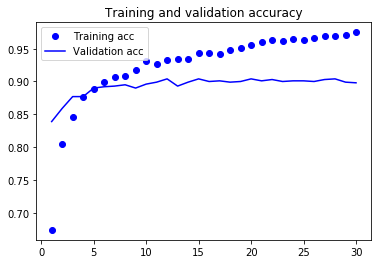

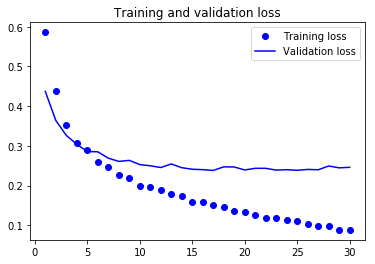

In [48]:
#################### 5.18 Defining and training the densely connected classifier ##############################

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 *512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, 
                    train_labels, 
                    epochs=30, 
                    batch_size=20, 
                    validation_data=(validation_features, validation_labels))

#################### 5.18 Defining and training the densely connected classifier ##############################

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
################################## FEATURE EXTRACTION WITHOUT DATA AUGMENTATION ######################################

#################### 5.20 Adding a densely connected classifier on top of the convolutional base #####################

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 *512))
model.add(layers.Dense(1, activation='sigmoid'))

# model.summary()

print('This is the number of trainable weights ''before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights ''after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [55]:
#################### 5.21 Training the model end to end with a frozen convolutional base ##########################

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=batch_size, 
                                                        class_mode='binary')
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])


# history = model.fit_generator(train_generator, 
#                               steps_per_epoch=100, 
#                               epochs=30, 
#                               validation_data=validation_generator, 
#                               validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [62]:
#################### 5.22 Freezing all layers up to a specific one ############################################

# conv_base.summary()

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

#################### 5.23 Fine-tuning the model #########################################################

model.compile(optimizer=optimizers.RMSprop(lr=1e-5), loss='binary_crossentropy', metrics=['acc'])

# history = model.fit_generator(train_generator, 
#                               steps_per_epoch=100, 
#                               epochs=100, 
#                               validation_data=validation_generator, 
#                               validation_steps=50)

#################### evaluate model on the test data: #####################################################

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test_acc:', test_acc) ### test accuracy is 97%.


Found 1000 images belonging to 2 classes.


KeyboardInterrupt: 